# Question

Build a report that for each day output average number of flights over the preceding 3 days.

# Query

```sql
With num_flights AS (
	select DATE(FlightDate) AS date_flight, COUNT(*) as flights
	from al_perf
	group by date_flight
)
Select date_flight, 
	   AVG(flights) OVER (order by date_flight ROWS BETWEEN 3 PRECEDING AND 1 PRECEDING) as Avg_Flights_Preceding_3_Days
From num_flights
where date_flight is not null;

# Result

30 rows returned.

# Visualization

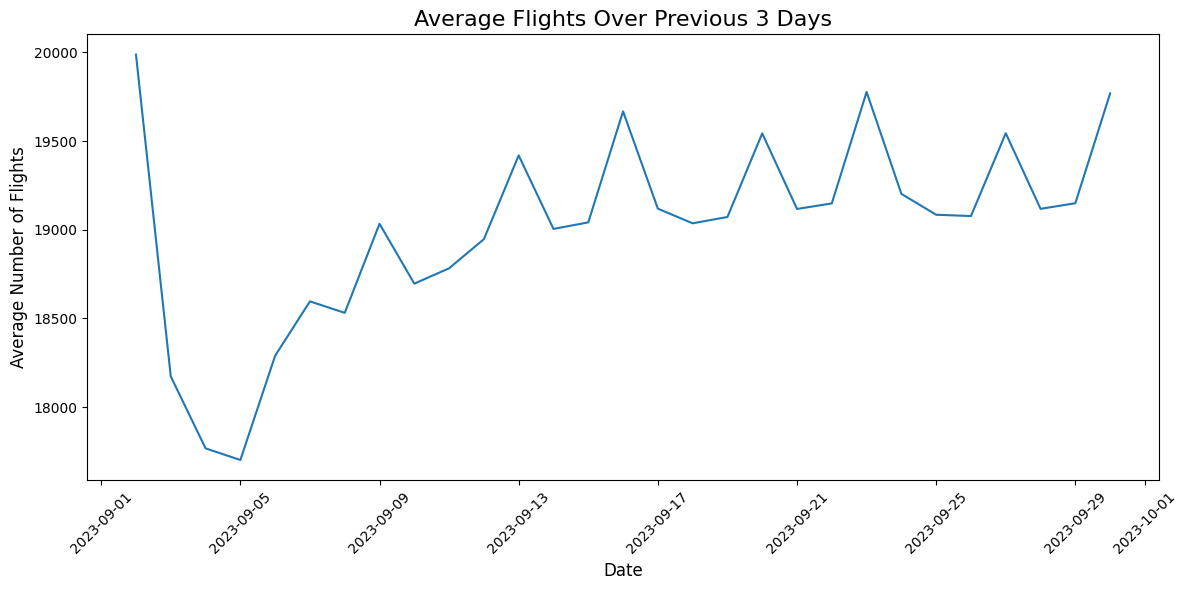

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("../csv/Q7.csv")

# Convert date column to datetime
df["date_flight"] = pd.to_datetime(df["date_flight"])

# Create line plot
plt.figure(figsize=(12,6))
plt.plot(df["date_flight"], df["Avg_Flights_Preceding_3_Days"])

# Title & labels
plt.title("Average Flights Over Previous 3 Days", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Number of Flights", fontsize=12)

# Rotate date labels
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
